In [82]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df_nodes = pd.read_csv("data/nodes.dat", delimiter = " ", header = None)
df_nodes.columns = ['nodeID', 'longitude', 'latitude']
df_nodes.head()

,nodeID,longitude,latitude
0,0,-121.904167,41.974556
1,1,-121.902153,41.974766
2,2,-121.896790,41.988075
3,3,-121.889603,41.998032
4,4,-121.886681,42.008739


In [84]:
df_edges = pd.read_csv("data/edges.dat", delimiter = " ", header = None)
df_edges.columns = ['edgeID', 'start node ID', 'end node ID', 'distance']
df_edges.head()

,edgeID,start node ID,end node ID,distance
0,0,0,1,0.002025
1,1,0,6,0.005952
2,2,1,2,0.014350
3,3,2,3,0.012279
4,4,3,4,0.011099


In [85]:
G = nx.Graph()

In [86]:
for i ,row in df_nodes.iterrows():
    G.add_node(int(row["nodeID"]), pos = (row["longitude"], row["latitude"]))

In [87]:
for i, row in df_edges.iterrows():
    G.add_edge(int(row["start node ID"]), int(row["end node ID"])) #

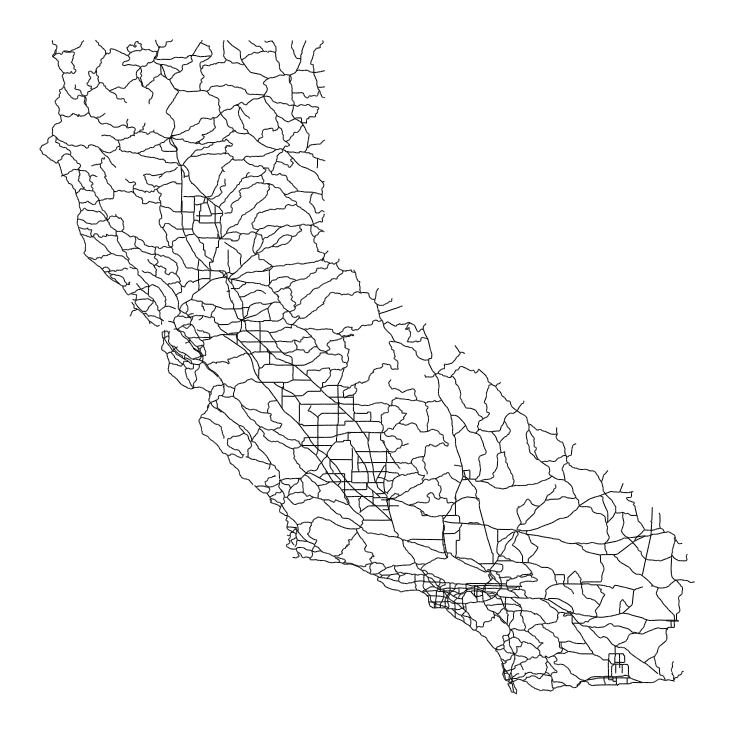

In [88]:
plt.figure(1, figsize=(10,10))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_size = 0.0)


In [62]:
df_places = pd.read_csv("data/places.dat", delimiter = " ", header = None)
df_places.columns = ['name', 'longitude', 'latitude']

In [117]:
df_places.head()

,name,longitude,latitude
0,airport,-114.18639,34.30806
1,airport,-114.43083,34.52750
2,airport,-114.52667,33.86944
3,airport,-114.57528,34.18389
4,airport,-114.60194,34.81944


In [116]:
df_test = df_places.groupby(['name'])
df_test.size()

name
airport     995
arch         20
area        287
arroyo        2
bar         278
           ... 
trail      1187
tunnel      128
valley     7596
well        237
woods       197
Length: 63, dtype: int64

# Exploring the points of interest

In [96]:
G_places = nx.Graph()

In [97]:
for i ,row in df_places.iterrows():
    G_places.add_node(i, pos = (row["longitude"], row["latitude"]), name = row["name"])

In [138]:
color_map = []
nodes = nx.get_node_attributes(G_places, 'name')
for node in nodes.values():
    if node=='lake':
        color_map.append('blue')
    else: 
        color_map.append('red')

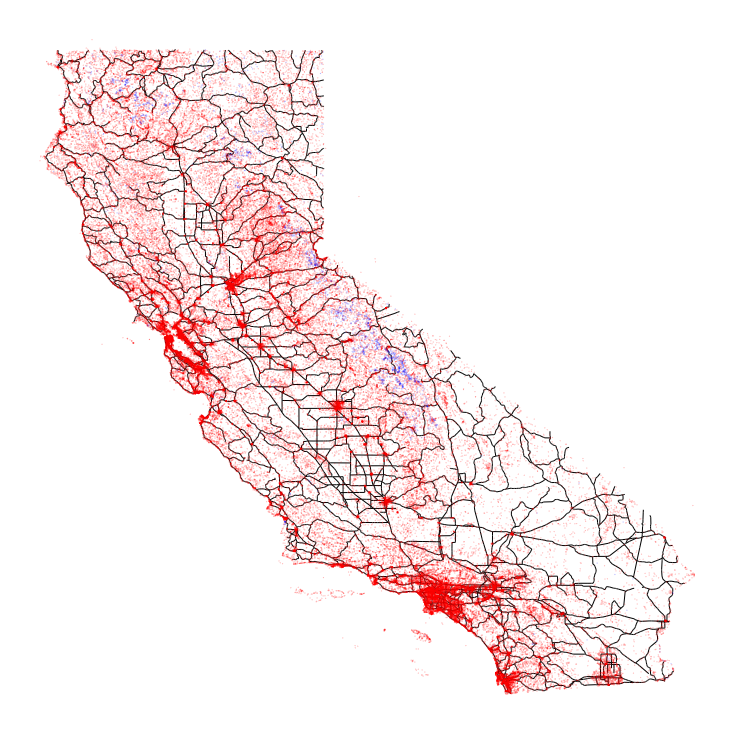

In [139]:
plt.figure(2, figsize=(10,10))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_size = 0.0)
pos = nx.get_node_attributes(G_places, 'pos')
nx.draw(G_places, pos, node_size = 0.01, node_color=color_map)

# Merge points of interest with road network

In [201]:
'''
For each edge:
Start Node ID, End Node ID, Number of Points on This Edge, Edge Length.
    For each point on this edge:
    Category ID, Distance of This Point to the Start Node of This Edge 
'''

#f = open("data/mapformat.dat", "r")
# TBD somehow connect points of interest to the graph   

'\nFor each edge:\nStart Node ID, End Node ID, Number of Points on This Edge, Edge Length.\n    For each point on this edge:\n    Category ID, Distance of This Point to the Start Node of This Edge \n'